Practice: 03 Scikit-learn with PCA & LDA



MSV: 20127284
Tên: Phùng Nghĩa Phúc

In [1]:
# importing các thư viện
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
# đọc data .csv với Pandas
data = pd.read_csv('travel-times.csv')

In [3]:
# setup numpy theo cá nhân
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)

In [4]:
#Xoá cột 'FuelEconomy' vì không sử dụng tới
data = data.drop('FuelEconomy', axis=1, errors='ignore')

In [5]:
# Hiển thị 5 dòng đầu tiên của data travel-times
print("## Head:")
data.head()

## Head:


,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime,Take407All,Comments
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,39.3,36.3,No,NaN
1,1/6/2012,8:20,Friday,GSK,51.63,130.3,81.8,88.9,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,37.5,35.9,No,NaN
3,1/4/2012,7:53,Wednesday,GSK,49.17,132.3,74.2,82.9,39.8,35.6,No,NaN
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,36.8,34.8,No,NaN


In [6]:
# Hiển thị 5 dòng cuối cùng của data travel-times
print("## Tail:")
data.tail()

## Tail:


,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime,Take407All,Comments
200,7/18/2011,8:09,Monday,GSK,54.52,125.6,49.9,82.4,65.5,39.7,No,NaN
201,7/14/2011,8:03,Thursday,GSK,50.90,123.7,76.2,95.1,40.1,32.1,Yes,NaN
202,7/13/2011,17:08,Wednesday,Home,51.96,132.6,57.5,76.7,54.2,40.6,Yes,NaN
203,7/12/2011,17:51,Tuesday,Home,53.28,125.8,61.6,87.6,51.9,36.5,Yes,NaN
204,7/11/2011,16:56,Monday,Home,51.73,125.0,62.8,92.5,49.5,33.6,Yes,NaN


In [7]:
# Tóm tắt dữ liệu
print("## Info:")
data.info()

## Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            205 non-null    object 
 1   StartTime       205 non-null    object 
 2   DayOfWeek       205 non-null    object 
 3   GoingTo         205 non-null    object 
 4   Distance        205 non-null    float64
 5   MaxSpeed        205 non-null    float64
 6   AvgSpeed        205 non-null    float64
 7   AvgMovingSpeed  205 non-null    float64
 8   TotalTime       205 non-null    float64
 9   MovingTime      205 non-null    float64
 10  Take407All      205 non-null    object 
 11  Comments        24 non-null     object 
dtypes: float64(6), object(6)
memory usage: 19.3+ KB


In [100]:
# Thống kê mô tả dữ liệu của data với số lượng, trung bình, độ lệch chuẩn, max, min và phân vị
data.describe()

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,50.981512,127.591707,74.477561,81.975610,41.904390,37.871707
std,1.321205,4.128450,11.409816,10.111544,6.849476,4.835072
min,48.320000,112.200000,38.100000,50.300000,28.200000,27.100000
25%,50.650000,124.900000,68.900000,76.600000,38.400000,35.700000
50%,51.140000,127.400000,73.600000,81.400000,41.300000,37.600000
75%,51.630000,129.800000,79.900000,86.000000,44.400000,39.900000
max,60.320000,140.900000,107.700000,112.100000,82.300000,62.400000


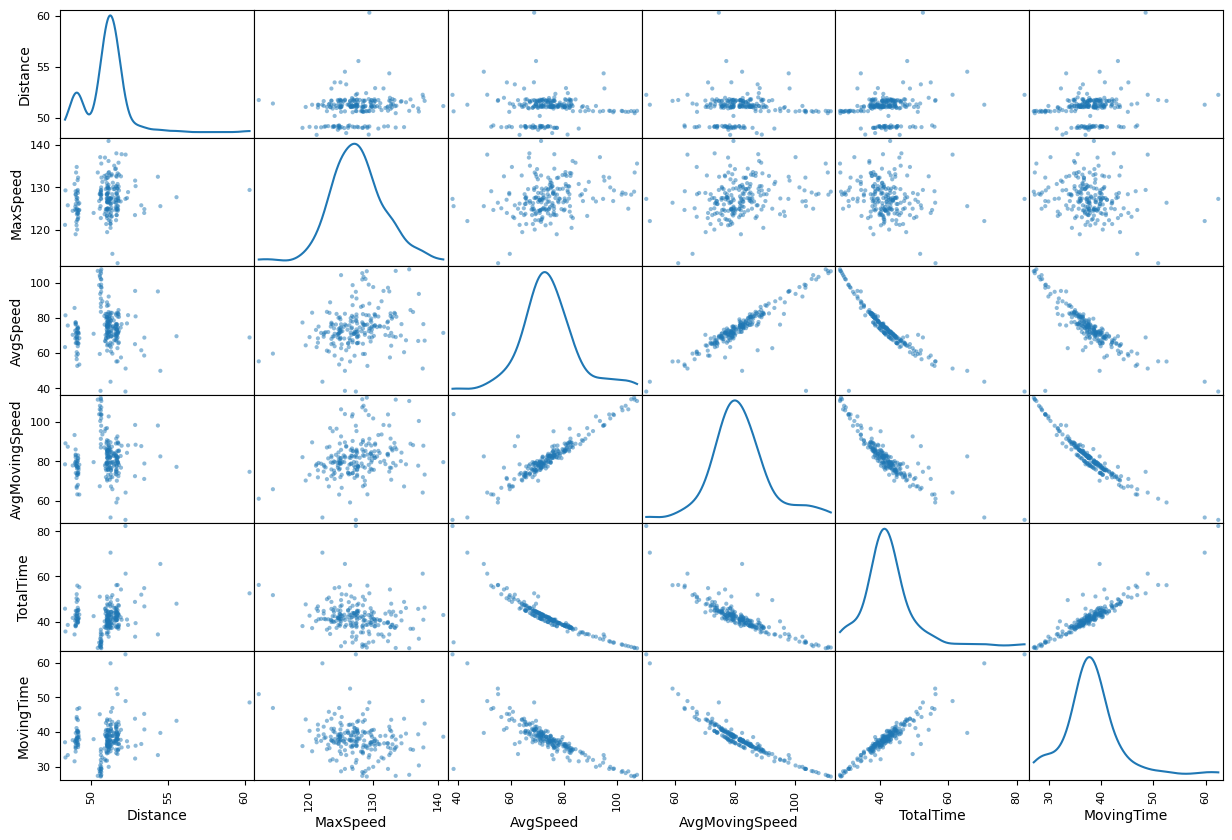

In [9]:
# plotting multivariate data
pd.plotting.scatter_matrix(data, diagonal="kde", figsize=(15, 10))
plt.show()

In [10]:
# Hiển thị sanh sách các tên cột trong data
data.columns

Index(['Date', 'StartTime', 'DayOfWeek', 'GoingTo', 'Distance', 'MaxSpeed',
       'AvgSpeed', 'AvgMovingSpeed', 'TotalTime', 'MovingTime', 'Take407All',
       'Comments'],
      dtype='object')

In [11]:
# Lấy cột X
X = data.loc[:, 'Distance':'MovingTime']
# Lấy cột y
y = data.loc[:,'DayOfWeek']
X

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
0,51.29,127.4,78.3,84.8,39.3,36.3
1,51.63,130.3,81.8,88.9,37.9,34.9
2,51.27,127.4,82.0,85.8,37.5,35.9
3,49.17,132.3,74.2,82.9,39.8,35.6
4,51.15,136.2,83.4,88.1,36.8,34.8
...,...,...,...,...,...,...
200,54.52,125.6,49.9,82.4,65.5,39.7
201,50.90,123.7,76.2,95.1,40.1,32.1
202,51.96,132.6,57.5,76.7,54.2,40.6
203,53.28,125.8,61.6,87.6,51.9,36.5


In [12]:
y

0         Friday
1         Friday
2      Wednesday
3      Wednesday
4        Tuesday
         ...    
200       Monday
201     Thursday
202    Wednesday
203      Tuesday
204       Monday
Name: DayOfWeek, Length: 205, dtype: object

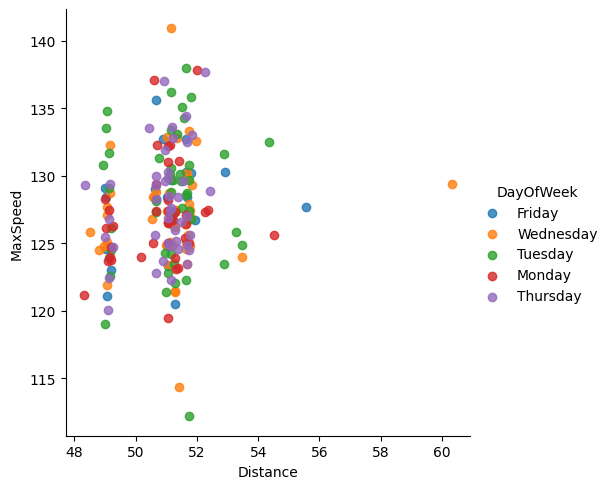

In [13]:
# Biểu đồ hiển thị quảng đường đi được và tốc độ tối đa của người lái xe trong tuần
sns.lmplot(x ='Distance', y ='MaxSpeed', fit_reg = False,hue = 'DayOfWeek',data = data)

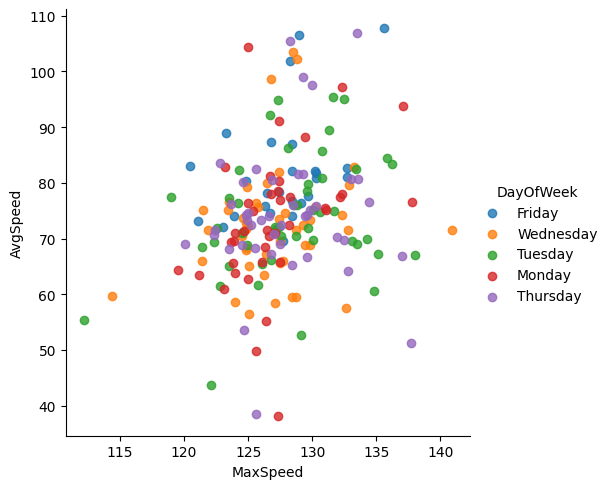

In [14]:
# Biểu đồ hiển thị tốc độ tối đa và trung bình tốc độ di chuyển của người lái xe trong tuần
sns.lmplot(x ='MaxSpeed', y ='AvgSpeed', fit_reg = False,hue = 'DayOfWeek',data = data)

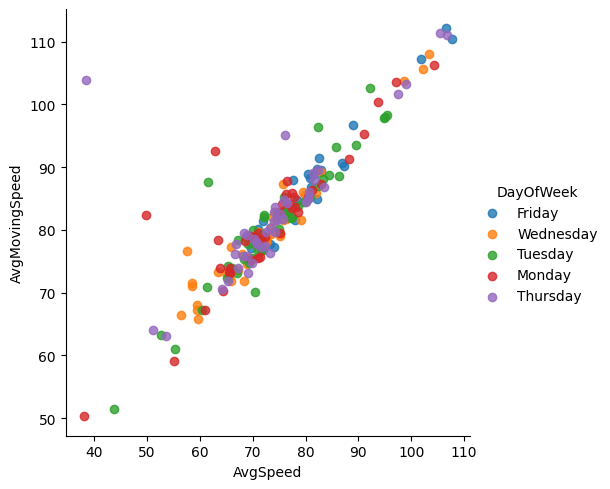

In [15]:
# Biểu đồ hiển thị trung bình tốc độ di chuyển và tốc độ trung bình chỉ khi xe được di chuyển của người lái xe trong tuần
sns.lmplot(x ='AvgSpeed', y ='AvgMovingSpeed', fit_reg = False,hue = 'DayOfWeek',data = data)

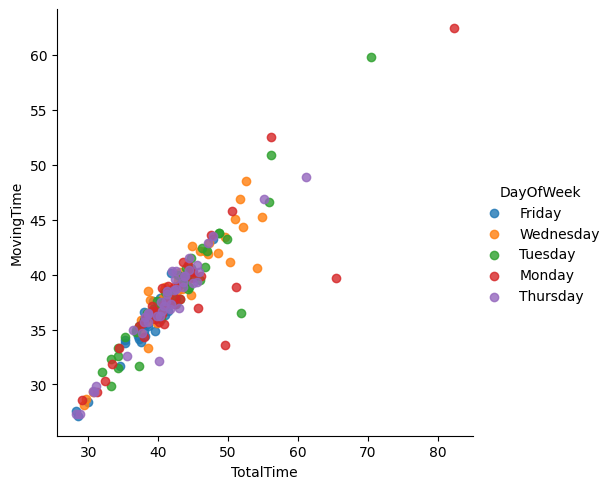

In [16]:
# Biểu đồ hiển thị thời gian cho toàn bộ chuyến đi và khoảng thời gian di chuyển của người lái xe trong tuần
sns.lmplot(x ='TotalTime', y ='MovingTime', fit_reg = False,hue = 'DayOfWeek',data = data)

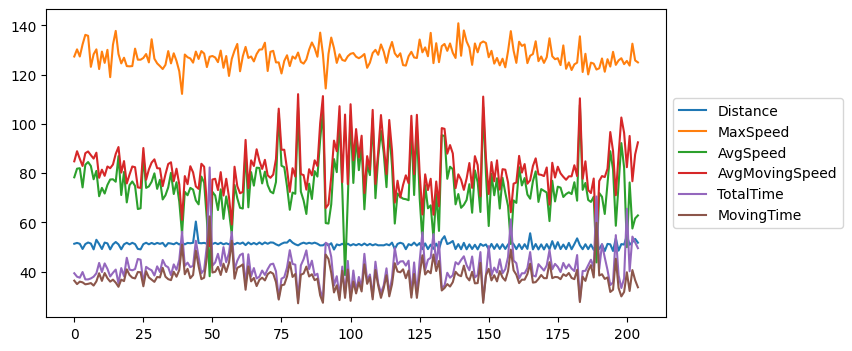

In [17]:
# Biểu đồ hiển thị toàn bộ thống số của chuyển đi trong tuần
ax = data[['Distance', 'MaxSpeed','AvgSpeed', 'AvgMovingSpeed', 'TotalTime', 'MovingTime']].plot(figsize=(8, 4))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

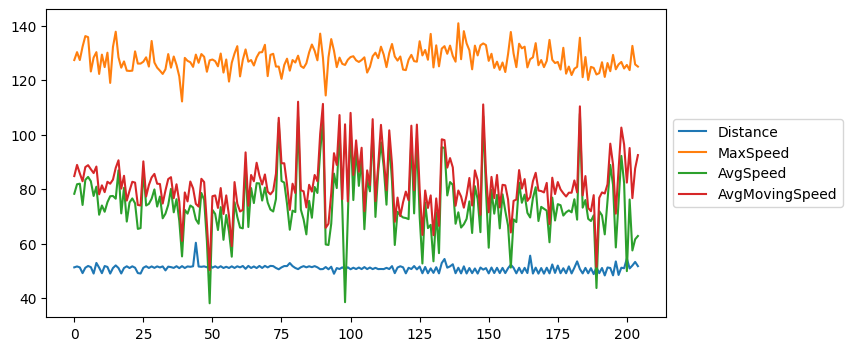

In [18]:
# Biểu đồ hiển thị Distance, MaxSpeed, AvgSpeed, AvgMovingSpeed
ax = data[['Distance', 'MaxSpeed','AvgSpeed', 'AvgMovingSpeed']].plot(figsize=(8, 4))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

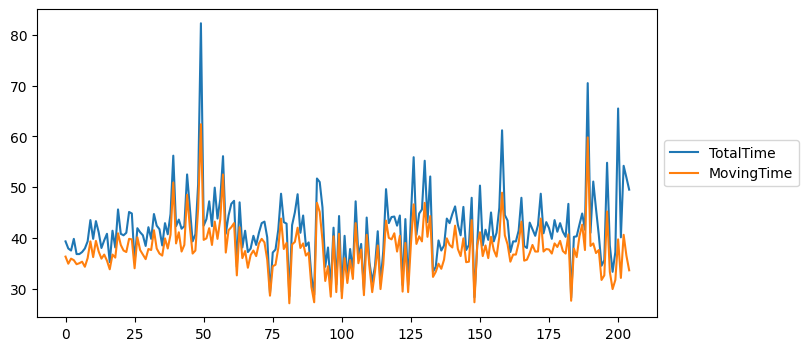

In [19]:
# Biểu đồ hiển thị TotalTime, MovingTime
ax = data[['TotalTime', 'MovingTime']].plot(figsize=(8, 4))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

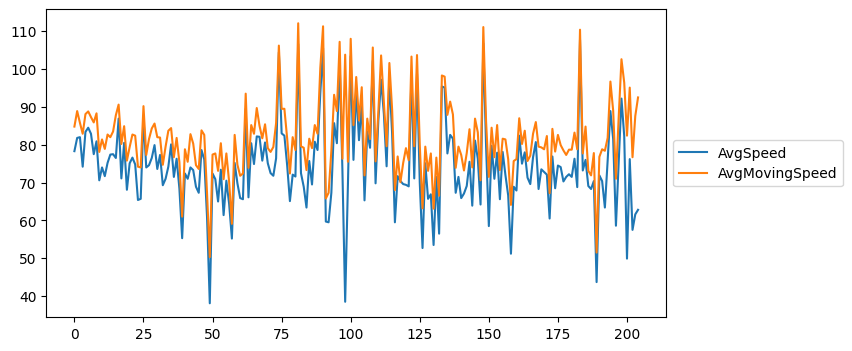

In [20]:
# Biểu đồ hiển thị AvgSpeed, AvgMovingSpeed
ax = data[['AvgSpeed', 'AvgMovingSpeed']].plot(figsize=(8, 4))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [21]:
# tính và thống kê tóm tắt cho dữ liệu đa biến
print(X.apply(np.mean))
print(X.apply(np.std))
print(X.apply(np.max))
print(X.apply(np.min))

Distance           50.981512
MaxSpeed          127.591707
AvgSpeed           74.477561
AvgMovingSpeed     81.975610
TotalTime          41.904390
MovingTime         37.871707
dtype: float64
Distance           1.317979
MaxSpeed           4.118368
AvgSpeed          11.381953
AvgMovingSpeed    10.086852
TotalTime          6.832750
MovingTime         4.823265
dtype: float64
Distance           60.32
MaxSpeed          140.90
AvgSpeed          107.70
AvgMovingSpeed    112.10
TotalTime          82.30
MovingTime         62.40
dtype: float64
Distance           48.32
MaxSpeed          112.20
AvgSpeed           38.10
AvgMovingSpeed     50.30
TotalTime          28.20
MovingTime         27.10
dtype: float64


In [24]:
# means and variances cho mỗi nhóm
def print_mean_and_sd_by_group(variables, group_variable):
    data_group_by = variables.groupby(group_variable)
    
    # Tính giá trị trung bình
    print("## Means:")
    print(data_group_by.apply(np.mean))
    
    # Tính độ lệch chuẩn
    print("\n## Standard deviations:")
    print(data_group_by.apply(np.std))
    
    #Tính số lượng mẫu
    print("\n## Sample sizes:")
    print(pd.DataFrame(data_group_by.apply(len)))


print_mean_and_sd_by_group(X, y)

## Means:
            Distance    MaxSpeed   AvgSpeed  AvgMovingSpeed  TotalTime  \
DayOfWeek                                                                
Friday     50.958889  127.559259  81.659259       87.937037  37.922222   
Monday     50.795897  127.017949  73.197436       81.405128  43.197436   
Thursday   50.902727  127.986364  74.365909       82.809091  41.177273   
Tuesday    51.127500  128.235417  73.781250       80.893750  42.520833   
Wednesday  51.073191  127.059574  72.229787       79.348936  43.170213   

           MovingTime  
DayOfWeek              
Friday      35.114815  
Monday      38.146154  
Thursday    37.418182  
Tuesday     38.427083  
Wednesday   39.085106  

## Standard deviations:
           Distance  MaxSpeed   AvgSpeed  AvgMovingSpeed  TotalTime  \
DayOfWeek                                                             
Friday     1.363691  3.422286   9.705564        9.115154   4.097093   
Monday     1.179099  3.710199  12.137365       10.463513   9.1214

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/nump

In [25]:
# Tính phương sai trong nhóm với một biến cụ thể
def calc_within_groups_variance(variable, group_variable):
    # find out how many values the group variable can take
    levels = sorted(set(group_variable))
    num_levels = len(levels)

    # Lấy giá trị trung bình và độ lệch chuẩn for each group:
    num_total = 0
    denom_total = 0

    for level_i in levels:
        level_i_data = variable[group_variable == level_i]
        level_i_length = len(level_i_data)

        # Lấy độ lệch chuẩn cho for group i:
        sdi = np.std(level_i_data)

        # Tính tử số và mẫu số của công thức phương sai cho group i 
        num_i = level_i_length * sdi ** 2
        denom_i = level_i_length

        # Cộng tử số và mẫu số của group i
        num_total = num_total + num_i
        denom_total = denom_total + denom_i

    # Tính phương sai
    v_w = num_total / (denom_total - num_levels)
    return v_w

# Tính phương sai trong tuần cho biến Distance (quảng đường đi được)
print("## v_w:")
calc_within_groups_variance(X.Distance, y)

## v_w:


1.7652520213013938

In [26]:
# Tính phương sai giữa các nhóm và phương sai trong nhóm đối với một biến
def calc_between_groups_variance(variable, group_variable):
    # find out how many values the group variable can take
    levels = sorted(set(group_variable))
    num_levels = len(levels)
    
    # tính giá trị trung bình tổng thể:
    grand_mean = np.mean(variable)
    
    # Lấy giá trị trung bình và độ lệch chuẩn for each group:
    num_total = 0
    denom_total = 0
    
    for level_i in levels:
        level_i_data = variable[group_variable == level_i]
        level_i_length = len(level_i_data)

        # Lấy giá trị trung bình cho for group i:
        mean_i = np.mean(level_i_data)

        # Lấy độ lệch chuẩn cho for group i:
        sdi = np.std(level_i_data)

        #Tính tử số và mẫu số cho phương sai giữa các nhóm
        num_i = level_i_length * ((mean_i - grand_mean) ** 2)
        denom_i = level_i_length

        # Cộng tử số và mẫu số của nhóm trên vào tổng
        num_total = num_total + num_i
        denom_total = denom_total + denom_i

    # tính phương sai giữa các nhóm
    v_b = num_total / (num_levels - 1)
    return v_b

# Tính phương sai giữa các ngày trong tuần và phương sai trong nhóm đối với Distance
print("## v_b:")
calc_between_groups_variance(X.Distance, y)

## v_b:


0.7621567398083797

In [27]:
# Tính sự khả tách cho từng biến 
def calc_separations(variables, group_variable):
    for variable_name in variables:
        variable_i = variables[variable_name]
        
        # Tính phương sai trong nhóm và giữa các nhóm
        v_w = calc_within_groups_variance(variable_i, group_variable)
        v_b = calc_between_groups_variance(variable_i, group_variable)

        #Tính hệ số khả tách cho biến.
        sep = v_b / v_w

        print("variable", variable_name, "Vw=", v_w, "Vb=", v_b, "separation=", sep)

calc_separations(X, y)

variable Distance Vw= 1.7652520213013938 Vb= 0.7621567398083797 separation= 0.43175520017050945
variable MaxSpeed Vw= 17.120387112102343 Vb= 13.22962000463854 separation= 0.7727407048691421
variable AvgSpeed Vw= 124.19872607641817 Vb= 429.4428913010443 separation= 3.4577076985219044
variable AvgMovingSpeed Vw= 97.37191936383405 Vb= 345.81354400341866 separation= 3.5514709606500885
variable TotalTime Vw= 44.80275573761345 Vb= 152.54372531444946 separation= 3.404784433525007
variable MovingTime Vw= 22.33945408915602 Vb= 75.3012711519549 separation= 3.3707749012769073


In [28]:
# Tính phương sai trong nhóm với 2 biến cụ thể
def calc_within_groups_covariance(variable1, variable2, group_variable):
    # Tìm các nhóm và số lượng nhóm
    levels = sorted(set(group_variable))
    num_levels = len(levels)

    cov_w = 0.0

    # Tính phương sai của variable1 và variable2 cho mỗi nhóm:
    for level_i in levels:
        level_i_data1 = variable1[group_variable == level_i]
        level_i_data2 = variable2[group_variable == level_i]

        #Tính giá trị trung bình cho từng biến
        mean1 = np.mean(level_i_data1)
        mean2 = np.mean(level_i_data2)

        level_i_length = len(level_i_data1)

        # Lấy phương sai cho nhóm này:
        term1 = 0.0

        for level_i_data1j, level_i_data2j in zip(level_i_data1, level_i_data2):
            term1 += (level_i_data1j - mean1) * (level_i_data2j - mean2)

        cov_group_i = term1  # covariance for this group
        cov_w += cov_group_i
    
    # Tính tổng chiều dài và phương sai trong nhóm:
    total_length = len(variable1)
    cov_w /= total_length - num_levels

    return cov_w

# Tính phương sai trong nhóm với AvgSpeed và AvgMovingSpeed
print("## cov_w:")
print(calc_within_groups_covariance(X.AvgSpeed, X.AvgMovingSpeed, y))

## cov_w:
95.16225377143297


In [29]:
# Tính phương sai giữa các nhóm và phương sai trong nhóm đối với 2 biến
def calc_between_groups_covariance(variable1, variable2, group_variable):
    # Tìm các nhóm và số lượng nhóm
    levels = sorted(set(group_variable))
    num_levels = len(levels)

    # Tính trung bình trên tổng mẫu
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)

    # calculate the between-groups covariance
    cov_b = 0.0
    for level_i in levels:
        level_i_data1 = variable1[group_variable == level_i]
        level_i_data2 = variable2[group_variable == level_i]
        
        #Tính giá trị trung bình cho từng biến
        mean1 = np.mean(level_i_data1)
        mean2 = np.mean(level_i_data2)

        level_i_length = len(level_i_data1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * level_i_length

        cov_b += term1

    cov_b /= num_levels - 1
    return cov_b

# Tính phương sai giữa các nhóm và phương sai trong nhóm đối với AvgSpeed và AvgMovingSpeed
print("## cov_b:")
print(calc_between_groups_covariance(X.AvgSpeed, X.AvgMovingSpeed, y))

## cov_b:
373.4992626478646


p-value:	 0.00023974233393727256
cor:		 0.2538685434138951
                Distance  MaxSpeed  AvgSpeed  AvgMovingSpeed  TotalTime  \
Distance        1.000000  0.145091 -0.006445        0.011874   0.197207   
MaxSpeed        0.145091  1.000000  0.253869        0.257823  -0.198775   
AvgSpeed       -0.006445  0.253869  1.000000        0.872143  -0.877806   
AvgMovingSpeed  0.011874  0.257823  0.872143        1.000000  -0.856986   
TotalTime       0.197207 -0.198775 -0.877806       -0.856986   1.000000   
MovingTime      0.197044 -0.222574 -0.835814       -0.944433   0.920935   

                MovingTime  
Distance          0.197044  
MaxSpeed         -0.222574  
AvgSpeed         -0.835814  
AvgMovingSpeed   -0.944433  
TotalTime         0.920935  
MovingTime        1.000000  


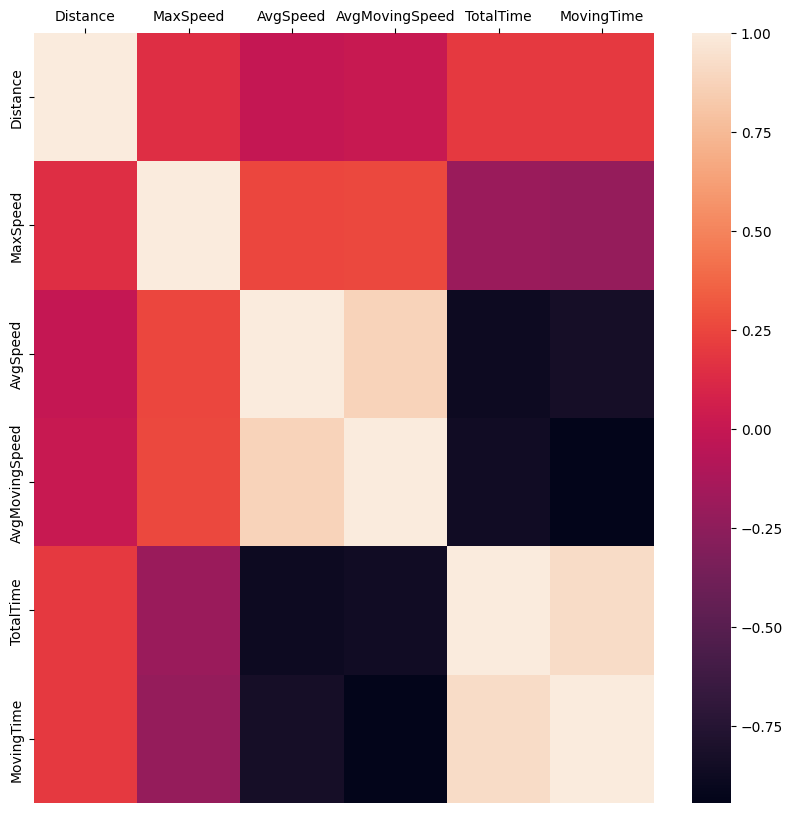

In [30]:
# tính tương quan cho dữ liệu đa biến
corr = stats.pearsonr(X.MaxSpeed, X.AvgSpeed)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

#Tính ma trận tương quan cho X
corr_mat = X.corr()
print(corr_mat)

# Tạo headmap để trực quan hóa ma trận tương quan
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, vmax=1., square=False).xaxis.tick_top()
plt.show()

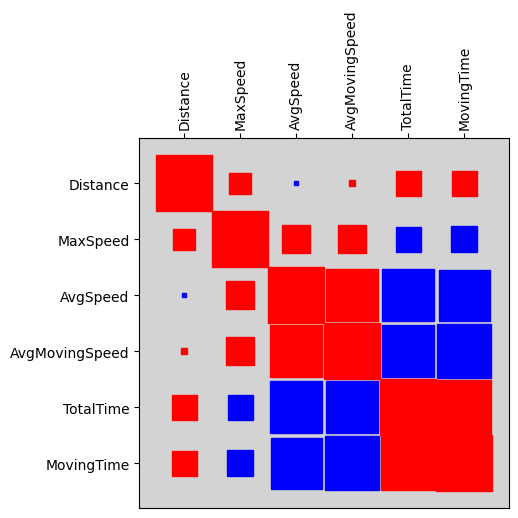

In [31]:
# Hinton diagram
def hinton(matrix, max_weight=None, ax=None):
    """Vẽ biểu đồ Hinton để trực quan hóa ma trận trọng số."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        #Tính trọng số của ma trận
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    # Vẽ các hình chữ nhật
    for (x, y), w in np.ndenumerate(matrix):
        # Đặt màu của hình chữ nhật dựa trên trọng số là dương hay âm
        color = 'red' if w > 0 else 'blue'
       
        # Tính size của hình chữ nhật
        size = np.sqrt(np.abs(w))
        # Tạo hình chữ nhật
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size, facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    n_ticks = matrix.shape[0]

    ax.xaxis.tick_top()
    ax.set_xticks(range(n_ticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(n_ticks))
    ax.set_yticklabels(matrix.columns)

    ax.grid(False)
    ax.autoscale_view()
    ax.invert_yaxis()


plt.figure()
hinton(corr_mat)
plt.show()

In [32]:
# in ra các hệ số tương quan tuyến tính cho từng cặp biến 
# trong tập dữ liệu, theo thứ tự của hệ số tương quan.
def most_highly_correlated(my_dataframe, num_to_report):
    # Tìm correlations
    cor_matrix = my_dataframe.corr()
    
    # đặt các tương quan trên đường chéo hoặc tam giác dưới thành 0,
    # vì vậy chúng sẽ không được báo cáo là cao nhất:
    cor_matrix *= np.tri(*cor_matrix.values.shape, k=-1).T
    
    # tìm n tương quan hàng đầu
    cor_matrix = cor_matrix.stack()
    cor_matrix = cor_matrix.reindex(cor_matrix.abs().sort_values(ascending=False).index).reset_index()
    
    # assign human-friendly names
    cor_matrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cor_matrix.head(num_to_report)


print(most_highly_correlated(X, 10))

    FirstVariable  SecondVariable  Correlation
0  AvgMovingSpeed      MovingTime    -0.944433
1       TotalTime      MovingTime     0.920935
2        AvgSpeed       TotalTime    -0.877806
3        AvgSpeed  AvgMovingSpeed     0.872143
4  AvgMovingSpeed       TotalTime    -0.856986
5        AvgSpeed      MovingTime    -0.835814
6        MaxSpeed  AvgMovingSpeed     0.257823
7        MaxSpeed        AvgSpeed     0.253869
8        MaxSpeed      MovingTime    -0.222574
9        MaxSpeed       TotalTime    -0.198775


In [33]:
# tiêu chuẩn hóa các biến
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

print(standardisedX.apply(np.mean))
print(standardisedX.apply(np.std))

Distance          5.545699e-15
MaxSpeed         -3.795338e-15
AvgSpeed         -5.502374e-16
AvgMovingSpeed    6.498866e-16
TotalTime        -2.664535e-16
MovingTime        8.231898e-16
dtype: float64
Distance          1.0
MaxSpeed          1.0
AvgSpeed          1.0
AvgMovingSpeed    1.0
TotalTime         1.0
MovingTime        1.0
dtype: float64


In [34]:
# principal component analysis
pca = PCA().fit(standardisedX)

In [35]:
def pca_summary(pca, standardised_data, out=True):
    # Tạo danh sách tên cho các thành phần chính
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    
    # Tính độ lệch chuẩn của từng thành phần chính
    a = list(np.std(pca.transform(standardised_data), axis=0))
    # Tính tỷ lệ phương sai được giải thích bởi từng thành phần chính
    b = list(pca.explained_variance_ratio_)
    
    # Tính tỷ lệ phương sai tích lũy được giải thích bởi từng thành phần chính
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    
    # Tạo chỉ mục đa cấp cho khung dữ liệu tóm tắt
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)

    if out:
        print("Importance of components:")
        print(summary)
        
    return summary

In [106]:
#In độ lệch chuẩn của từng thành phần chính và tổng phương sai
summary = pca_summary(pca, standardisedX)

print(summary.sdev)

Importance of components:
                  sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           1.829638               0.866207              0.866207
PC2           0.930571               0.050363              0.916571
     Standard deviation
PC1            1.829638
PC2            0.930571


In [107]:
print(np.sum(summary.sdev**2))

Standard deviation    4.213537
dtype: float64


In [37]:
# Tính có bao nhiêu thành phần chính để giữ lại
def scree_plot(pca, standardised_values):
    # Tính phương sai của từng thành phần chính
    y = np.std(pca.transform(standardised_values), axis=0)**2
    
    # Tạo dãy giá trị x tương ứng với số thành phần chính
    x = np.arange(len(y)) + 1
    
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

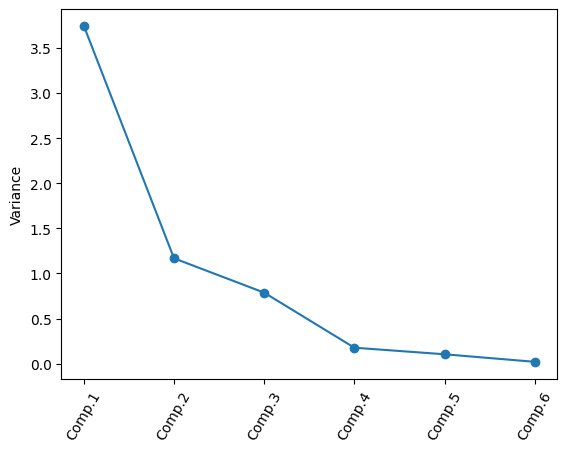

     Standard deviation
PC1            3.744493
PC2            1.167666
PC3            0.786928
PC4            0.176749
PC5            0.103892
PC6            0.020273
[ 0.06161303 -0.16399166 -0.48216719 -0.49421312  0.49259752  0.49992645]
0.9999999999999998


In [38]:
# Vẽ các thành phần chính
plt.figure()
scree_plot(pca, standardisedX)

print(summary.sdev**2)

# tải cho các thành phần chính
print(pca.components_[0])
print(np.sum(pca.components_[0]**2))

In [39]:
# tính giá trị của thành phần chính cho từng mẫu trong tập dữ liệu
def calc_pc(variables, loadings):
    # tìm số lượng mẫu trong tập dữ liệu và số lượng biến
    num_samples, num_variables = variables.shape
    
    # tạo một vector để lưu trữ thành phần
    pc = np.zeros(num_samples)
    
    # tính giá trị của thành phần cho từng mẫu
    for i in range(num_samples):
        value_i = 0
        for j in range(num_variables):
            value_ij = variables.iloc[i, j]

            loading_j = loadings[j]
            value_i = value_i + (value_ij * loading_j)

        pc[i] = value_i

    return pc


print(calc_pc(standardisedX, pca.components_[0]))
print(pca.transform(standardisedX)[:, 0])

print(pca.components_[1])
print(np.sum(pca.components_[1]**2))

[-0.62892178 -1.32369497 -1.00682158 -0.69287326 -1.69932068 -1.71317249
 -1.03034187 -1.09957951 -0.98138882  0.83675071 -0.43417592  0.67540153
 -0.26132282 -0.36088998 -0.67828001 -1.05536793 -1.88315948  0.10063596
 -0.8251031   1.34864004  0.26533949 -0.07006281 -0.2811876   1.17141746
  1.12856773 -1.7918577   0.48089411  0.0392998  -0.66304227 -0.82565154
  0.19256199 -0.12025472  1.39491918  0.41282622 -0.241575   -0.60681879
  0.62756671 -0.03913076  1.31138307  4.86946458  0.35768413  0.97134245
 -0.02368353  0.37629297  2.82769132  1.52432028 -0.60869879 -0.23357809
  2.94199219  8.61852529  0.53507589  0.75647046  1.74136063  0.17250872
  2.4198326   0.73842097  2.33409126  4.556244   -0.30459953  0.94782016
  1.90642407  1.79685281 -2.45415376  1.62690682 -0.86584027 -0.03132109
 -1.46561294 -0.9567203  -0.29320843 -0.99359909  0.41196089  0.51694716
  0.41184499 -0.51222896 -4.25416677 -1.13955673 -1.21996167  0.02331899
  2.2220154   0.22184672  0.51594568 -4.99164222  0

## Means:
           Distance  MaxSpeed  AvgSpeed  AvgMovingSpeed  TotalTime  MovingTime
DayOfWeek                                                                     
Friday    -0.017165 -0.007879  0.630972        0.591010  -0.582806   -0.571582
Monday    -0.140833 -0.139317 -0.112470       -0.056557   0.189242    0.056901
Thursday  -0.059777  0.095828 -0.009810        0.082630  -0.106417   -0.094029
Tuesday    0.110766  0.156302 -0.061177       -0.107254   0.090219    0.115145
Wednesday  0.069561 -0.129210 -0.197486       -0.260406   0.185258    0.251572

## Standard deviations:
           Distance  MaxSpeed  AvgSpeed  AvgMovingSpeed  TotalTime  MovingTime
DayOfWeek                                                                     
Friday     1.034684  0.830981  0.852715        0.903667   0.599626    0.705632
Monday     0.894627  0.900891  1.066369        1.037342   1.334960    1.195259
Thursday   0.700981  0.952221  1.062599        1.032402   0.871641    0.913917
Tuesday    0.9091

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.9/dist-packages/nump

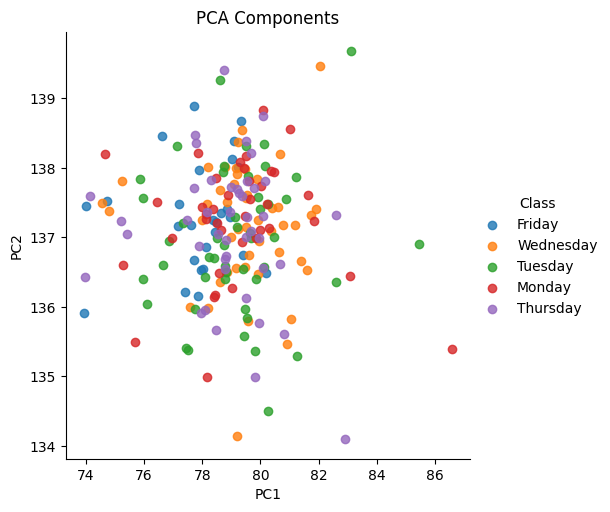

In [108]:
# biểu đồ phân tán của các thành phần chính
def pca_scatter(pca, standardised_values, classifs):
    # chuyển đổi các giá trị được tiêu chuẩn hóa sang không gian PCA
    foo = pca.transform(standardised_values)
    
    # tạo DataFrame với các giá trị PC1 và PC2 đã chuyển đổi và nhãn lớp
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])

    sns.lmplot(x="PC1", y="PC2", data=bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)
plt.title('PCA Components')
print_mean_and_sd_by_group(standardisedX, y)

In [57]:
#Linear Discriminant Analysis
lda = LDA().fit(X, y)

In [42]:
# Các giá trị của dataset travel-times.csv được lưu trữ trong scalings_ của LDA.
#Tạo bản data đẹp
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
        
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)

Coefficients of linear discriminants:


,LD1,LD2,LD3,LD4
Distance,-0.059257,0.338918,-0.409285,0.092612
MaxSpeed,-0.054925,0.089484,0.090202,0.203417
AvgSpeed,0.038729,-0.094171,-0.177913,0.081632
AvgMovingSpeed,0.062466,0.013750,0.223432,-0.083727
TotalTime,-0.004036,-0.411381,-0.102382,0.207191
MovingTime,0.001315,0.363934,0.214856,-0.266318


In [44]:
# Trích xuất dữ liệu từ LD1 từ data sau khi được làm đẹp
pretty_scalings_.LD1

Distance         -0.059257
MaxSpeed         -0.054925
AvgSpeed          0.038729
AvgMovingSpeed    0.062466
TotalTime        -0.004036
MovingTime        0.001315
Name: LD1, dtype: float64

In [45]:
# tính các giá trị của hàm discriminant thứ nhất
def calclda(variables, loadings):
    # tìm số lượng mẫu trong tập dữ liệu và số lượng biến
    numsamples, numvariables = variables.shape

    # tạo một vector để lưu trữ hàm phân biệt
    ld = np.zeros(numsamples)
    # tính giá trị của hàm phân biệt cho từng mẫu
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            
            valuei = valuei + (valueij * loadingj)
        ld[i] = valuei
    # chuẩn hóa hàm phân biệt sao cho giá trị trung bình của nó bằng 0:
    ld = scale(ld, with_std=False)
    return ld

In [46]:
calclda(X, lda.scalings_[:, 0])

array([ 0.3251623 ,  0.54120489,  0.53885045, -0.09875765,  0.26189447,
        0.33193854,  0.89258571,  0.45158565,  0.38881601, -0.11735344,
       -0.03894629, -0.19670606, -0.08980459,  0.71659672, -0.03613255,
       -0.17754907,  0.99309309,  0.03813683,  0.46228505, -0.46035063,
        0.09539685,  0.31656793, -0.1334492 , -0.65954771, -0.64926907,
        1.06640797, -0.39399176,  0.11502736, -0.18472136,  0.5007679 ,
        0.09195133,  0.32155044, -0.40988652, -0.04651847, -0.04747896,
        0.52183671, -0.51351664,  0.13073638, -0.31484341, -1.29311793,
       -0.31654272, -0.55320677,  0.05700806, -0.04505489, -1.35821858,
       -0.78333665,  0.14241832,  0.01121831, -1.24624955, -3.57745022,
       -0.37704143, -0.4185142 , -0.80890751, -0.30465934, -0.96506321,
       -0.45742217, -0.70154088, -2.18835971, -0.05610824, -0.95191403,
       -0.65923514, -1.0000064 ,  1.13548983, -0.85011452,  0.44955798,
        0.15806319,  0.74835384,  0.3062686 , -0.11441191,  0.11

In [98]:
# tính toán biến “chuẩn hóa theo nhóm”
def groupStandardise(variables, groupvariable):
    # tìm số lượng mẫu trong tập dữ liệu và số lượng biến
    numsamples, numvariables = variables.shape
    
    # tìm tên biến
    variablenames = variables.columns
    # tính phiên bản chuẩn hóa nhóm của từng biến
    variables_new = pd.DataFrame()
    for i in range(numvariables):
        variable_name = variablenames[i]
        variablei = variables[variable_name]

        # tính phương sai trong nhóm cho biến hiện tại
        variablei_Vw = calc_within_groups_variance(variablei, groupvariable)
        
        # tính giá trị trung bình của biến hiện tại
        variablei_mean = np.mean(variablei)
        # tính và thêm phiên bản chuẩn hóa theo nhóm của biến hiện tại
        variablei_new = (variablei - variablei_mean)/(np.sqrt(variablei_Vw))
        variables_new[variable_name] = variablei_new

    return variables_new

In [99]:
# “chuẩn hóa theo nhóm” với X và y của data
groupstandardisedX = groupStandardise(X, y)
# Sử dụng LDA cho data đã được chuẩn hoá theo nhóm
lda2 = LDA().fit(groupstandardisedX, y)
# Làm đẹp dữ liệu lda2
pretty_scalings(lda2, groupstandardisedX)

,LD1,LD2,LD3,LD4
Distance,-0.078730,0.450296,-0.543787,0.123047
MaxSpeed,-0.227261,0.370255,0.373227,0.841676
AvgSpeed,0.431616,-1.049478,-1.982740,0.909744
AvgMovingSpeed,0.616395,0.135678,2.204766,-0.826191
TotalTime,-0.027015,-2.753574,-0.685292,1.386831
MovingTime,0.006214,1.720119,1.015511,-1.258740


In [72]:
lda2.fit_transform(groupstandardisedX, y)[:, 0]

array([ 0.3251623 ,  0.54120489,  0.53885045, -0.09875765,  0.26189447,
        0.33193854,  0.89258571,  0.45158565,  0.38881601, -0.11735344,
       -0.03894629, -0.19670606, -0.08980459,  0.71659672, -0.03613255,
       -0.17754907,  0.99309309,  0.03813683,  0.46228505, -0.46035063,
        0.09539685,  0.31656793, -0.1334492 , -0.65954771, -0.64926907,
        1.06640797, -0.39399176,  0.11502736, -0.18472136,  0.5007679 ,
        0.09195133,  0.32155044, -0.40988652, -0.04651847, -0.04747896,
        0.52183671, -0.51351664,  0.13073638, -0.31484341, -1.29311793,
       -0.31654272, -0.55320677,  0.05700806, -0.04505489, -1.35821858,
       -0.78333665,  0.14241832,  0.01121831, -1.24624955, -3.57745022,
       -0.37704143, -0.4185142 , -0.80890751, -0.30465934, -0.96506321,
       -0.45742217, -0.70154088, -2.18835971, -0.05610824, -0.95191403,
       -0.65923514, -1.0000064 ,  1.13548983, -0.85011452,  0.44955798,
        0.15806319,  0.74835384,  0.3062686 , -0.11441191,  0.11

In [73]:
# tính sự khả tách đạt được bởi từng hàm phân biệt
# hàm rpredict() mô phỏng đầu ra của hàm predict() trong R
def rpredict(lda, X, y, out=False):
    ret = {"class": lda.predict(X),
           "posterior": pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)}

    ret["x"] = pd.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]

    if out:
        print("class")
        print(ret["class"])
        print()
        print("posterior")
        print(ret["posterior"])
        print()
        print("x")
        print(ret["x"])
    return ret

lda_values = rpredict(lda, standardisedX, y, True)

class
['Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'
 'Monday' 'Monday' 'Monday' 'Monday' 'Monday'

In [74]:
#Tính khoảng cách dưới dạng tỷ lệ của phương sai giữa các nhóm với phương sai bên trong các nhóm:
calc_separations(lda_values["x"], y)

variable LD1 Vw= 1.000000000000001 Vb= 3.8913881314556273 separation= 3.891388131455623
variable LD2 Vw= 1.0000000000000002 Vb= 2.347929717180682 separation= 2.3479297171806817


In [75]:
# tính tỷ lệ dấu vết cho từng phân biệt tuyến tính
def proportion_of_trace(lda):
    # Tính tỷ lệ phương sai được giải thích cho mỗi LD và làm tròn đến bốn chữ số thập phân
    ret = pd.DataFrame([round(i, 4) for i in lda.explained_variance_ratio_ if round(i, 4) > 0], columns=["ExplainedVariance"])
    
    # Tạo index cho mỗi phương sai
    ret.index = ["LD"+str(i+1) for i in range(ret.shape[0])]
    
    # Hoán vị DataFrame để hiển thị dễ dàng hơn
    ret = ret.transpose()
    print("Proportion of trace:")
    
    print(ret.to_string(index=False))
    return ret

proportion_of_trace(LDA(solver="eigen").fit(X, y));

Proportion of trace:
   LD1    LD2    LD3    LD4
0.4963 0.2995 0.1409 0.0633


In [77]:
#Biểu đồ xếp chồng của các giá trị LDA để phân tích phân biệt tuyến tính

def ldahist(data, g, sep=False):
    # Tính giá trị nhỏ nhất và lớn nhất cho trục x
    xmin = np.trunc(np.min(data)) - 1
    xmax = np.trunc(np.max(data)) + 1
    
    ncol = len(set(g))
    
    binwidth = 0.5
    
    #Tạo array với binwidth
    bins=np.arange(xmin, xmax + binwidth, binwidth)
    
    if sep:
        fig, axl = plt.subplots(ncol, 1, sharey=True, sharex=True)
    else:
        fig, axl = plt.subplots(1, 1, sharey=True, sharex=True)
        axl = [axl]*ncol

    # vẽ biểu đồ cho dữ liệu của từng nhóm     
    for ax, (group, gdata) in zip(axl, data.groupby(g)):
        sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
        ax.set_xlim([xmin, xmax])
        if sep:
            ax.set_xlabel("group"+str(group))
        else:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            
    plt.tight_layout()

<ipython-input-77-028b53f6d8d7>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
<ipython-input-77-028b53f6d8d7>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
<ipython-input-77-028b53

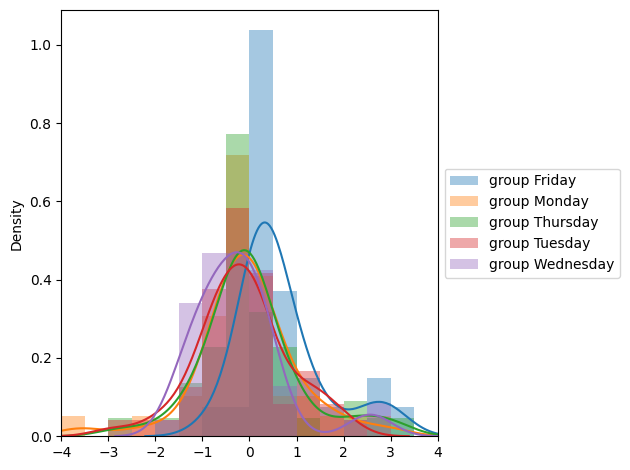

In [97]:
#Vẽ biểu đồ xếp chống của các giá trị LDA với hàm phân biệt đầu tiên
ldahist(lda_values["x"].LD1, y)

<ipython-input-77-028b53f6d8d7>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
<ipython-input-77-028b53f6d8d7>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
<ipython-input-77-028b53

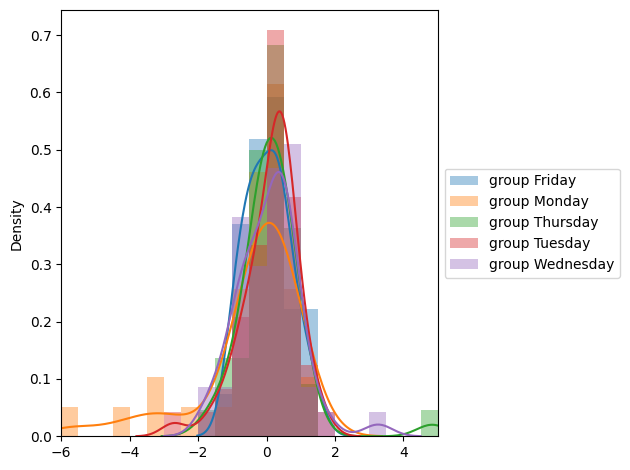

In [79]:
#Vẽ biểu đồ xếp chống của các giá trị LDA với hàm phân biệt thứ 2
ldahist(lda_values["x"].LD2, y)

In [85]:
# Giá trị của data sau khi tính sự khả tách của dữ liệu
lda_values["x"]

,LD1,LD2
0,0.325162,0.265671
1,0.541205,0.433609
2,0.538850,0.519124
3,-0.098758,-0.114835
4,0.261894,1.053335
...,...,...
200,-1.118476,-5.700063
201,1.104809,-1.715843
202,-1.366173,-1.759229
203,-0.227345,-2.702526


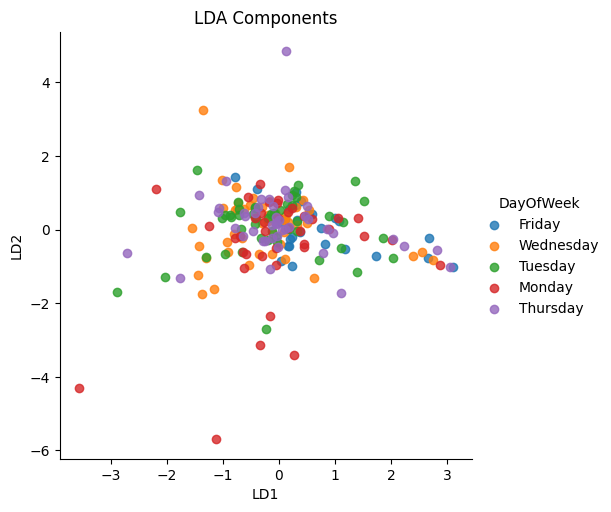

In [95]:
#Biểu đồ phân tán của các hàm phân biệt của LDA
sns.lmplot(x="LD1", y="LD2", data= lda_values["x"].join(y), hue='DayOfWeek',fit_reg=False)
plt.title('LDA Components')
plt.show()

[[ 0.02439764  0.00629558  0.00833619]
 [ 0.04276064  0.0004777  -0.04170155]
 [ 0.03973955  0.03791255  0.01450053]
 [ 0.00061889 -0.02096073 -0.07161556]
 [ 0.03483342  0.03598901 -0.13440338]
 [ 0.03961175  0.04266349 -0.12922693]
 [ 0.05580712  0.02330607  0.08394891]
 [ 0.03019986 -0.02677812 -0.00140787]
 [ 0.03430667  0.0031051  -0.04752003]
 [-0.0143676  -0.00418451  0.08827624]
 [ 0.0008769  -0.00782014 -0.02026901]
 [-0.01453112  0.00482305  0.04512751]
 [ 0.0010202   0.00122099 -0.04116961]
 [ 0.03505283  0.01035835  0.16165564]
 [ 0.00845064  0.01958954 -0.0709379 ]
 [ 0.00598477 -0.03747965 -0.17885155]
 [ 0.06998202  0.03454568 -0.00018542]
 [-0.00336674 -0.03375199  0.05606219]
 [ 0.03339178  0.02986212  0.02204461]
 [-0.03554587  0.00175062  0.06321683]
 [ 0.00370538  0.03347567  0.0788068 ]
 [ 0.01819551  0.01009449  0.07229283]
 [-0.00129465 -0.00042766 -0.04854331]
 [-0.0480529  -0.01756293  0.02601029]
 [-0.04714273 -0.01243008  0.0277702 ]
 [ 0.07263826  0.04271963

/usr/local/lib/python3.9/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


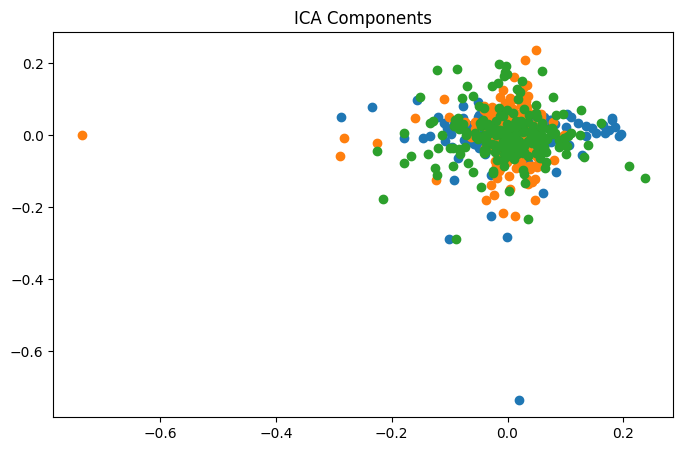

In [102]:
#Independent Component Analysis(ICA)
ica = FastICA(n_components=3)
X_ica = ica.fit_transform(X)
print(X_ica)

plt.figure(figsize=(8,5))
plt.title('ICA Components')
plt.scatter(X_ica[:,0], X_ica[:,1])
plt.scatter(X_ica[:,1], X_ica[:,2])
plt.scatter(X_ica[:,2], X_ica[:,0])

[[-0.31706329 -0.01067641]
 [-0.64982915  0.35213504]
 [-0.42087476  0.01533121]
 [-0.33092136 -1.10095121]
 [-0.64825422  0.09020204]
 [-0.64902661  0.45382704]
 [-0.54913308  0.06593334]
 [-0.61373579 -1.1008174 ]
 [-0.48004509  0.96654586]
 [ 0.33232177 -0.20931207]
 [-0.2030023  -1.19645798]
 [ 0.31312902  0.14449385]
 [-0.10309132  0.03776671]
 [-0.27567385 -1.33059067]
 [-0.22184197 -0.12799082]
 [-0.50994664  0.54007499]
 [-0.87343303  0.09744577]
 [-0.0810592  -1.29184075]
 [-0.35790811 -0.13316211]
 [ 0.62932045  0.10551076]
 [ 0.17284513 -0.26999211]
 [-0.08208734  0.10240118]
 [-0.10549085 -0.12744467]
 [ 0.54650999 -1.19357907]
 [ 0.53821922 -1.31295272]
 [-0.83489113  0.10595504]
 [ 0.43967484  0.09701837]
 [-0.02142219 -0.21676539]
 [-0.24108055  0.19535682]
 [-0.41586382 -0.10323452]
 [-0.00440353  0.09660004]
 [-0.04858212 -0.12080106]
 [ 0.73387964  0.08640397]
 [ 0.10034957 -0.69891648]
 [-0.1809128   0.10480563]
 [-0.28618054 -0.02046885]
 [ 0.44653079 -0.22354065]
 

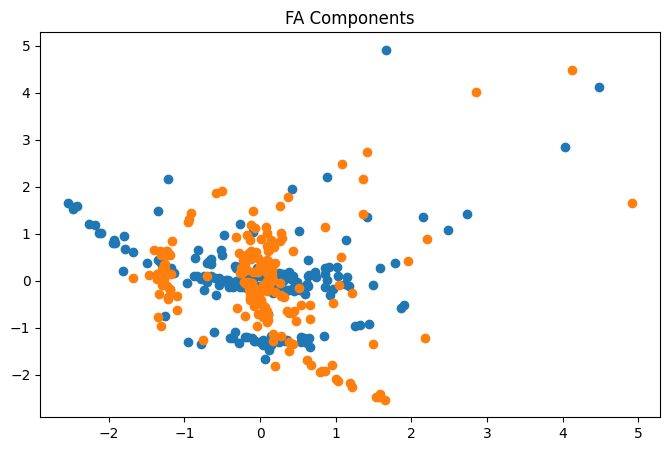

In [105]:
#Factor Analysis (FA)
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)
print(X_fa)

plt.figure(figsize=(8,5))
plt.title('FA Components')
plt.scatter(X_fa[:,0], X_fa[:,1])
plt.scatter(X_fa[:,1], X_fa[:,0])
